In [1]:
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

[1] "/home/samkyy/R/x86_64-pc-linux-gnu-library/tcga-gbm-R4/renv/library/R-4.0/x86_64-pc-linux-gnu"
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                               
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

In [2]:
resultsPath <- "~/scratch/gete-gbm/results"
getwd()

[1] "/scratch/samkyy/gete-gbm/results/GBMGSCTE"

In [3]:
library(ggplot2)
library(dplyr)
source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_go.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, 

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Load Data

In [ ]:
# c7.GBM <- readRDS("~/projects/def-ytanaka/samkyy/gete-gbm/results/2022-01-24_gbmsc_GO/gbmsc_c7_markersGO_GBM.rds")
# c7.NSC <- readRDS("~/projects/def-ytanaka/samkyy/gete-gbm/results/2022-01-24_gbmsc_GO/gbmsc_c7_markersGO_NSC.rds")

In [5]:
c7.GBM <- readRDS("/home/samkyy/projects/def-ytanaka/samkyy/gete-gbm/results/2021-10-14_gbmsc_DEG/cluster7.GBMmarkers.rds")
c7.GBM <- c7.GBM %>% tibble::rownames_to_column(var = "gene")
# c7.NSC <- readRDS("/home/samkyy/projects/def-ytanaka/samkyy/gete-gbm/results/2021-10-14_gbmsc_DEG/cluster7.NCSmarkers.rds")
c7 <- readRDS("/home/samkyy/projects/def-ytanaka/samkyy/gete-gbm/results/2021-10-14_gbmsc_DEG/cluster7.markers.rds")
c7 <- c7 %>% tibble::rownames_to_column(var = "gene")

In [6]:
head(c7.GBM)
head(c7)

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IGFBP2,1.091533e-248,-4.221090,0.154,0.860,3.547591e-244,243.4501,1.507407e-245,244.8218
2,NOVA1,2.314177e-191,-2.086224,0.479,0.973,7.521307e-187,186.1237,1.597939e-188,187.7964
3,CKB,5.467835e-156,-2.267760,0.236,0.791,1.777101e-151,150.7503,2.517027e-153,152.5991
4,TSFM,4.144443e-151,-2.544499,0.032,0.506,1.346986e-146,145.8706,1.430869e-148,147.8444
5,FLAM-C,2.479654e-150,1.606307,0.921,0.717,8.059123e-146,145.0937,6.848804e-148,147.1644
6,MARCH9,1.204882e-147,-2.975844,0.053,0.529,3.915987e-143,142.4072,2.773237e-145,144.5570


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TMSB10,0,-1.1576966,0.836,0.973,0,0,Inf,Inf
2,ACTB,0,-1.1784577,0.845,0.971,0,0,Inf,Inf
3,NDUFA4,0,-1.0795162,0.638,0.936,0,0,Inf,Inf
4,LDHA,0,-1.4326403,0.320,0.754,0,0,Inf,Inf
5,FTH1,0,-1.8633158,0.843,0.929,0,0,Inf,Inf
6,CFL1,0,-0.9017693,0.616,0.931,0,0,Inf,Inf


## GO

In [7]:
# Extract upregulatded GBM markers
c7.gbmUP <- c7.GBM %>% filter(avg_log2FC >= 0.5 & p_val_adj <= 10e-32)
# Extract downregulated GBM markes (aka upreg. in NSC)
c7.gbmDN <- c7.GBM %>% filter(avg_log2FC <= -0.5 & p_val_adj <= 10e-32)
# Extract up & down regulated GBM markers

c7UP <- c7 %>% filter(avg_log2FC >= 0.5 & p_val_adj <= 0.05)
c7DN <- c7 %>% filter(avg_log2FC <= -0.5 & p_val_adj <= 0.05)

In [8]:
# add cluster ID column
c7.gbmUP$cluster <- as.integer(7)
c7.gbmDN$cluster <- as.integer(7)
c7UP$cluster <- as.integer(7)
c7DN$cluster <- as.integer(7)

In [9]:
head(c7.gbmUP)
head(c7.gbmDN)
head(c7UP)
head(c7DN)

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,FLAM-C,2.479654e-150,1.606307,0.921,0.717,8.059123e-146,145.09371,6.848804e-148,147.16439,7
2,RPS27,1.442337e-98,2.436382,0.871,0.631,4.687739e-94,93.32904,1.244917e-96,95.90486,7
3,B2M,1.628701e-80,1.284923,0.866,0.675,5.293441e-76,75.27626,9.371817e-79,78.02818,7
4,RPS12,1.539251e-79,2.109646,0.839,0.586,5.002721e-75,74.30079,7.591808e-78,77.11965,7
5,RPLP1,7.081568e-74,1.864275,0.893,0.745,2.301581e-69,68.63797,2.963529e-72,71.52819,7
6,MBP,1.180028e-71,1.534958,0.439,0.048,3.835210e-67,66.41621,4.792998e-70,69.31939,7


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,IGFBP2,1.091533e-248,-4.221090,0.154,0.860,3.547591e-244,243.4501,1.507407e-245,244.8218,7
2,NOVA1,2.314177e-191,-2.086224,0.479,0.973,7.521307e-187,186.1237,1.597939e-188,187.7964,7
3,CKB,5.467835e-156,-2.267760,0.236,0.791,1.777101e-151,150.7503,2.517027e-153,152.5991,7
4,TSFM,4.144443e-151,-2.544499,0.032,0.506,1.346986e-146,145.8706,1.430869e-148,147.8444,7
5,MARCH9,1.204882e-147,-2.975844,0.053,0.529,3.915987e-143,142.4072,2.773237e-145,144.5570,7
6,CDK4,1.679441e-133,-3.494194,0.129,0.596,5.458352e-129,128.2629,3.313298e-131,130.4797,7


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,AluSp,0,0.7223646,1,1,0,0,Inf,Inf,7
2,AluJo,0,0.7370293,1,1,0,0,Inf,Inf,7
3,AluJr,0,0.7329050,1,1,0,0,Inf,Inf,7
4,AluSx,0,0.7427912,1,1,0,0,Inf,Inf,7
5,AluSz6,0,0.7136329,1,1,0,0,Inf,Inf,7
6,AluSc,0,0.7481383,1,1,0,0,Inf,Inf,7


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,TMSB10,0,-1.1576966,0.836,0.973,0,0,Inf,Inf,7
2,ACTB,0,-1.1784577,0.845,0.971,0,0,Inf,Inf,7
3,NDUFA4,0,-1.0795162,0.638,0.936,0,0,Inf,Inf,7
4,LDHA,0,-1.4326403,0.320,0.754,0,0,Inf,Inf,7
5,FTH1,0,-1.8633158,0.843,0.929,0,0,Inf,Inf,7
6,CFL1,0,-0.9017693,0.616,0.931,0,0,Inf,Inf,7


In [11]:
mkdirToday() 
setwdToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/GBMGSCTE"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-09-20"
[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2022-09-20"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-09-20"


In [12]:
write.csv(c7.gbmUP, "cluster7.GBM.GOupreg.csv", row.names = FALSE)
write.csv(c7.gbmDN, "cluster7.NSC.GOupreg.csv", row.names = FALSE)
write.csv(c7UP, "cluster7.GOupreg.csv", row.names = FALSE)
write.csv(c7DN, "cluster7.GOdownreg.csv", row.names = FALSE)

In [10]:
# Perform GO analysis on each of these groups
GBM.GO <- geneontology(c7.gbmUP)
NSC.GO <- geneontology(c7.gbmDN)
c7UP.GO <- geneontology(c7UP)
c7DN.GO <- geneontology(c7DN)

[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] 1
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”
Warning message in rm(data):
“object 'data' not found”


[1] "MF"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "CC"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "Cluster:7gene ontology analysis complete."
[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] 1
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”
Warning message in rm(data):
“object 'data' not found”


[1] "MF"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "CC"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "Cluster:7gene ontology analysis complete."
[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] 1
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”
Warning message in rm(data):
“object 'data' not found”


[1] "MF"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "CC"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "Cluster:7gene ontology analysis complete."
[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] 1
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”
Warning message in rm(data):
“object 'data' not found”


[1] "MF"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "CC"


Warning message in makeValidParams(.Object):
“converting geneIds from list to atomic vector via unlist”


[1] "Cluster:7gene ontology analysis complete."


In [13]:
saveRDS(GBM.GO, file="gbmsc_c7_GO_GBM.rds")
saveRDS(NSC.GO, file="gbmsc_c7_GO_NSC.rds")
saveRDS(c7UP.GO, file="gbmsc_c7_GOup.rds")
saveRDS(c7DN.GO, file="gbmsc_c7_GOdown.rds")

In [14]:
GBM.GO <- makeGOsummary(GBM.GO)
NSC.GO <- makeGOsummary(NSC.GO)
c7UP.GO <- makeGOsummary(c7UP.GO)
c7DN.GO <- makeGOsummary(c7DN.GO)

Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 
Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 
Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 
Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 


In [15]:
head(GBM.GO)

,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:0006614,SRP-dependent cotranslational protein targeting to membrane,BP,2.810250e-26,3.489714e-23,22.45721,183.7647,0.1780982,15,105,7
2,GO:0006613,cotranslational protein targeting to membrane,BP,5.109391e-26,3.489714e-23,22.45721,175.9074,0.1848829,15,109,7
3,GO:0000184,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",BP,2.358139e-25,8.053046e-23,22.09404,157.3866,0.2035408,15,120,7
4,GO:0045047,protein targeting to ER,BP,2.358139e-25,8.053046e-23,22.09404,157.3866,0.2035408,15,120,7
5,GO:0072599,establishment of protein localization to endoplasmic reticulum,BP,3.963008e-25,1.082694e-22,21.96549,151.5785,0.2103255,15,124,7
6,GO:0070972,protein localization to endoplasmic reticulum,BP,9.704333e-24,2.209353e-21,20.65573,120.4186,0.2578183,15,152,7


In [16]:
write.csv(GBM.GO, "cluster7.GBM.GOupreg_summary.csv", row.names = FALSE)
write.csv(NSC.GO, "cluster7.NSC.GOupreg_summary.csv", row.names = FALSE)
write.csv(c7UP.GO, "cluster7.GOupreg_summary.csv", row.names = FALSE)
write.csv(c7DN.GO, "cluster7.GOdownreg_summary.csv", row.names = FALSE)

## Plotting the Dot Plots

In [18]:
GBM.GO$group <- "GBM"
NSC.GO$group <- "NSC"
c7UP.GO$group <- "TE-enriched"
c7DN.GO$group <- "TE-enriched"

cancer.GO <- GBM.GO %>% dplyr::filter((Class == "BP" | Class == "MF") & 
                                      grepl('oxida|stress|hypoxia|monoxia|prolif|mobil|cell cycle|aging|senescence', Term) &
                                        p.adj <= 0.01)
cancer.GO <- rbind(cancer.GO, NSC.GO %>% dplyr::filter((Class == "BP" | Class == "MF") & 
                               grepl('oxida|stress|hypoxia|monoxia|prolif|mobil|cell cycle|aging|senescence', Term) &
                                        p.adj <= 0.01))
cancer.GO <- rbind(cancer.GO, c7UP.GO %>% dplyr::filter((Class == "BP" | Class == "MF") & 
                               grepl('oxida|stress|hypoxia|monoxia|prolif|mobil|cell cycle|aging|senescence', Term) &
                                        p.adj <= 0.01))
cancer.GO <- rbind(cancer.GO, c7DN.GO %>% dplyr::filter((Class == "BP" | Class == "MF") & 
                               grepl('oxida|stress|hypoxia|monoxia|prolif|mobil|cell cycle|aging|senescence', Term) &
                                        p.adj <= 0.01))
head(cancer.GO)
tail(cancer.GO)

,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,GO:0043618,regulation of transcription from RNA polymerase II promoter in response to stress,BP,3.346639e-05,5.575011e-04,3.253754,25.481633,0.18488286,4,109,7,GBM
2,GO:0043620,regulation of DNA-templated transcription in response to stress,BP,4.129276e-05,6.409762e-04,3.193158,24.096525,0.19505990,4,115,7,GBM
3,GO:0097201,negative regulation of transcription from RNA polymerase II promoter in response to stress,BP,1.820178e-04,2.323704e-03,2.633819,125.493333,0.02035408,2,12,7,GBM
4,GO:0042127,regulation of cell population proliferation,BP,1.126100e-06,7.758383e-05,4.110229,3.544315,8.79910951,25,1766,7,NSC
5,GO:0008283,cell population proliferation,BP,4.920190e-06,2.171357e-04,3.663269,3.169121,10.19919432,26,2047,7,NSC
6,GO:0001666,response to hypoxia,BP,1.202688e-05,4.214325e-04,3.375272,6.284282,1.78872045,10,359,7,NSC


,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
70,GO:0016209,antioxidant activity,MF,7.078478e-12,8.228731e-10,9.084667,10.200917,2.2493461,18,86,7,TE-enriched
71,GO:0004601,peroxidase activity,MF,8.060220e-07,2.025947e-05,4.693372,9.032421,1.3600697,10,52,7,TE-enriched
72,GO:0008379,thioredoxin peroxidase activity,MF,2.263566e-06,5.012181e-05,4.299973,150.176471,0.1307759,4,5,7,TE-enriched
73,GO:0004129,cytochrome-c oxidase activity,MF,7.163859e-05,1.168840e-03,2.932245,10.270426,0.7323452,6,28,7,TE-enriched
74,GO:0015002,heme-copper terminal oxidase activity,MF,7.163859e-05,1.168840e-03,2.932245,10.270426,0.7323452,6,28,7,TE-enriched
75,GO:0004602,glutathione peroxidase activity,MF,1.724332e-04,2.358278e-03,2.627405,11.747368,0.5492589,5,21,7,TE-enriched


In [30]:
write.csv(cancer.GO, "gte_GO_GBM.NSC.c7.csv", row.names=FALSE)

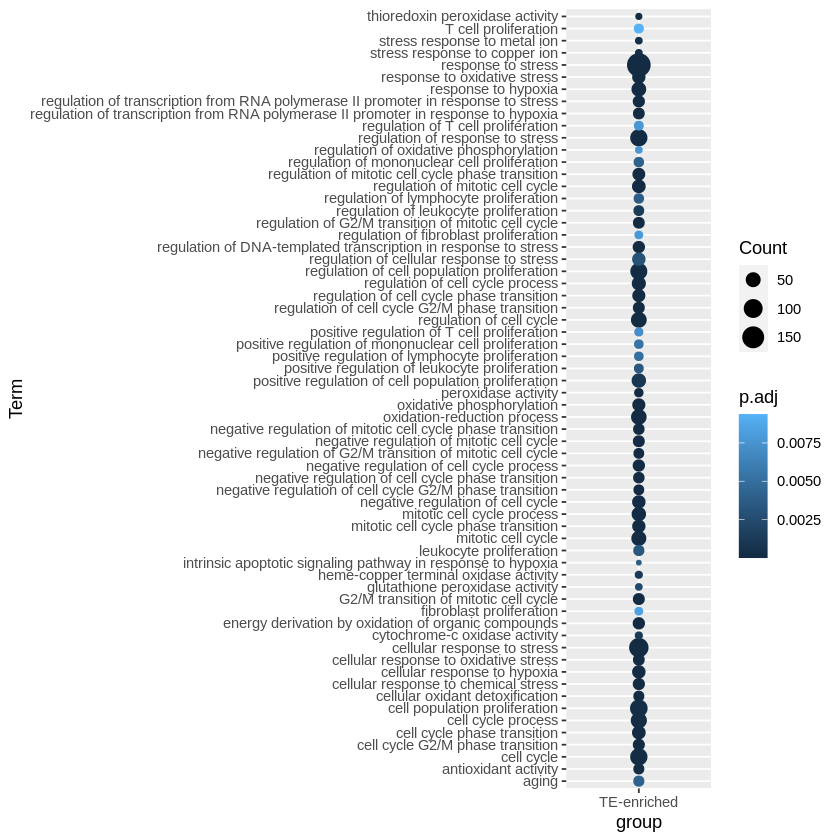

In [29]:
p1 <- cancer.GO %>% filter(group = "TE-enriched") %>% 
                ggplot(aes(x=group, y=Term, color = `p.adj`, size = Count)) + 
                        geom_point()

p1
# ggsave("gte_GO_GBM.NSC.c7_dot.tiff", compression = 'lzw')
# ggsave("gte_GO_GBM.NSC.c7_dot.png")
# See the rest in R script in harddrive. 

In [19]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] GO.db_3.12.1         org.Hs.eg.db_3.12.0  GOstats_2.56.0      
 [4] graph_1.68.0         Category_2.56.0      Matrix_1.3-2        
 [7] AnnotationDbi_1.52.0 IRanges_2.24.1       S4Vector